# Hipothesis Tests

In this notebook we will review some traditional but important hypothesis tests.

Chi-Square test is a statistical method to determine if two **categorical variables** have a significant correlation between them.

- **Chi-Squared Goodness-Of-Fit Test**: it is used to determine wheter the distribution of sample categorical data matches an expected distribution.

- **Chi-Squared Test of Independence (Association)**: it is used when we want to see if there is any relationship between two categorical variables.

## Chi-Squared Goodness-Of-Fit Test

The chi-squared goodness-of-fit method tests whether the distribution of sample categorical data matches an expected distribution.

Let's generate some fake demographic data for U.S. and town_X and walk through the chi-square goodness of fit test to check whether they are different:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 

Let's generate our fictitious population's race:

In [2]:
national_race = pd.DataFrame({'race':["white"]*100000 + ["hispanic"]*60000 + ["black"]*50000 + ["asian"]*10000})
print(national_race.shape)

(220000, 1)


In [3]:
national_race.groupby('race').size()

race
asian        10000
black        50000
hispanic     60000
white       100000
dtype: int64

The following bar chart shows the frequencies of the national races.

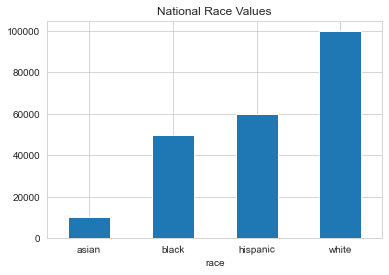

In [4]:
national_race.groupby('race').size().plot(kind='bar', 
            rot=True, title='National Race Values');

Let's calculate the relative frequencies:

In [5]:
national_race.groupby('race').size() / len(national_race)

race
asian       0.045455
black       0.227273
hispanic    0.272727
white       0.454545
dtype: float64

The difference between the two graphs is the y-axis scale.

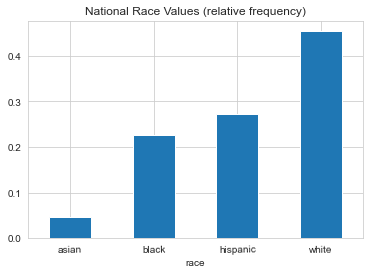

In [6]:
(national_race.groupby('race').size() / len(national_race)).plot(kind='bar', 
            rot=True, title='National Race Values (relative frequency)');

Plotting both graphs together:

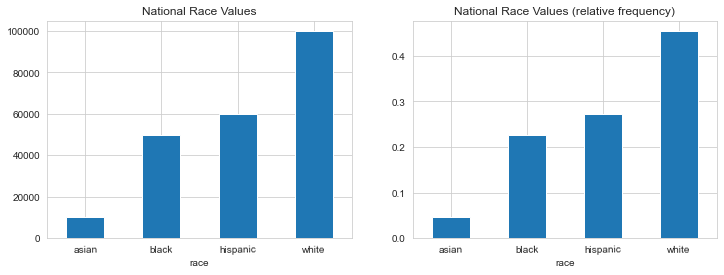

In [7]:
plt.figure(figsize = (12, 4))

plt.subplot(121)
national_race.groupby('race').size().plot(kind='bar', 
            rot=True, title='National Race Values');

plt.subplot(122)
(national_race.groupby('race').size() / len(national_race)).plot(kind='bar', 
            rot=True, title='National Race Values (relative frequency)');            

Let's create a town X with the following race composition:

In [8]:
town_X = pd.DataFrame({'race': ["white"]*60 + ["hispanic"]*30 + ["black"]*25 +["asian"]*8})
print(town_X.shape)

(123, 1)


In [9]:
town_X.groupby('race').size()

race
asian        8
black       25
hispanic    30
white       60
dtype: int64

Let's graph both bar charts:

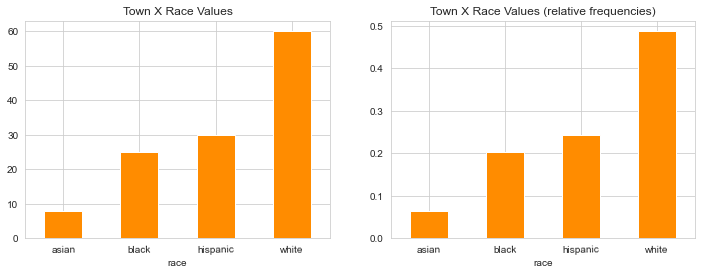

In [10]:
plt.figure(figsize = (12, 4))

plt.subplot(121)
town_X.groupby('race').size().plot(kind='bar', rot=True, 
            color='darkorange', title='Town X Race Values');

plt.subplot(122)
(town_X.groupby('race').size() / len(town_X)).plot(kind='bar', 
            color='darkorange', rot=True, title='Town X Race Values (relative frequencies)');

Let's plot now both relative frequencies: national and from town_X

In [11]:
df_r = pd.DataFrame()
df_r['National'] = national_race.groupby('race').size() / len(national_race)
df_r['town_X'] = town_X.groupby('race').size() / len(town_X)

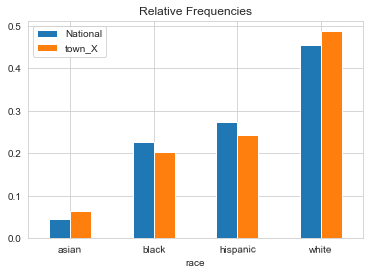

In [12]:
df_r.plot(kind='bar', rot=True, title='Relative Frequencies');

In [13]:
import scipy.stats as st

In [14]:
stat, p = st.chisquare(f_obs=town_X.groupby('race').size()/len(town_X)*100,   # Array of observed counts
         f_exp=national_race.groupby('race').size()/len(national_race)*100)   # Array of expected counts
print('chisquare stat = %.3f, pvalue = %.4f' %(stat, p))               

chisquare stat = 1.646, pvalue = 0.6490


0.6490 > 0.05 There are not reasons to reject Ho.

It looks like there are no significant differences between national frequencies and the town_x frequencies.

Let's analyse town_Y

In [15]:
town_Y = pd.DataFrame({'race': ["white"]*300 + ["hispanic"]*30 + ["black"]*25 +["asian"]*8})
town_Y.head()

,race
0,white
1,white
2,white
3,white
4,white


In [16]:
town_Y.groupby('race').size()

race
asian         8
black        25
hispanic     30
white       300
dtype: int64

In [17]:
town_Y.groupby('race').size()/len(town_Y)

race
asian       0.022039
black       0.068871
hispanic    0.082645
white       0.826446
dtype: float64

In [18]:
df_r['town_Y'] = town_Y.groupby('race').size() / len(town_Y)

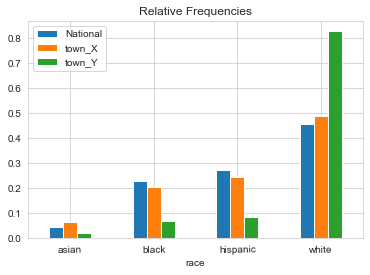

In [19]:
df_r.plot(kind='bar', rot=True, title='Relative Frequencies');

It looks like town_Y does not follow the national race distribution. Let's prove it.

In [20]:
stat, p = st.chisquare(f_obs=town_Y.groupby('race').size()/len(town_Y)*100,    # Array of observed counts
         f_exp=national_race.groupby('race').size()/len(national_race)*100)    # Array of expected counts
print('chisquare stat = %.3f, pvalue = %.4f' %(stat, p))  

chisquare stat = 55.923, pvalue = 0.0000


0.0000 < 0.05 therefore town_Y does not follow the national race distribution.

## Chi-Squared Test of Independence

Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another.

The chi-squared test of independence tests whether two categorical variables are independent.

**Ho**: There are no relationships between the two categorical variables. If you know the value of one variable, it does not help you predict the value of another variable.

**Ha**: There are relationships between the categorical variables. Knowing the value of one variable does help you predict the value of another variable.

In [21]:
np.random.seed(10)

In [22]:
# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["black","hispanic","white"],
                              p = [0.20 ,0.30, 0.5],
                              size=1000)

In [23]:
# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

In [24]:
voters = pd.DataFrame({"race":voter_race, "party":voter_party})

In [25]:
voter_tab = pd.crosstab(voters.race, voters.party, margins = True)
voter_tab.columns = ["democrat","independent","republican","row_totals"]
voter_tab.index = ["black","hispanic","white","col_totals"]

In [26]:
voter_tab

,democrat,independent,republican,row_totals
black,86,32,96,214
hispanic,122,58,109,289
white,189,96,212,497
col_totals,397,186,417,1000


In [27]:
# Removing margins
observed = voter_tab.iloc[0:3,0:3]   # Get table without totals for later use
observed

,democrat,independent,republican
black,86,32,96
hispanic,122,58,109
white,189,96,212


In [28]:
stat, p, df, expm = st.chi2_contingency(observed= observed)
print('chisquare stat = %.3f, pvalue = %.4f' %(stat, p))  

chisquare stat = 4.547, pvalue = 0.3371


The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.

As expected, given the high p-value, the test result does not detect a significant relationship between the variables.

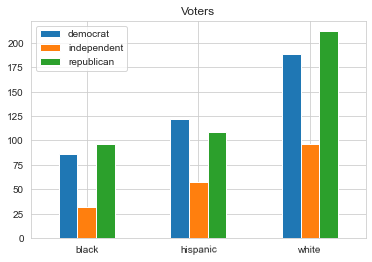

In [29]:
observed.plot(kind='bar', rot=True, title='Voters');

**Example**: The table describes the degrees earned by men and women in foreign languages in 1992. (Moore, p. 296, #5.8) 

In [30]:
table = pd.DataFrame({'Bachelos':[10,6], 'Masters':[20,9], 'Doctorate':[30,17]}, index=['Male','Female'])
table

,Bachelos,Masters,Doctorate
Male,10,20,30
Female,6,9,17


In [31]:
stat, p, dof, expected = st.chi2_contingency(table)
print('chisquare stat = %.3f, pvalue = %.4f' %(stat, p))  

chisquare stat = 0.272, pvalue = 0.8730


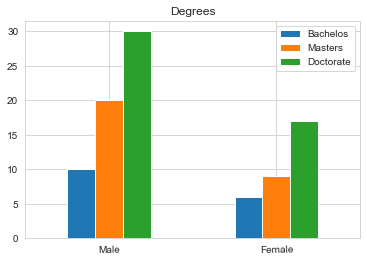

In [32]:
table.plot(kind='bar', rot=True, title='Degrees');